### Imports for Analysis

In [ ]:
!pip install ktrain

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

import ktrain
from ktrain import text

## DataFrame read from .csv file - Tweets from the selected theme

In [6]:
twitter_dataframe = pd.read_csv("result.csv")

twitter_dataframe.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count
0,2021-07-15 23:59:59,EncompassBt,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",1524
1,2021-07-15 23:59:59,gregtv1,@_juliabradley Dying of covid 19 is a bit of a...,[],1044
2,2021-07-15 23:59:59,gurmeet_judge,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",884
3,2021-07-15 23:59:59,RobMaaddi,Washington Arizona Indianapolis and Los Angele...,[],19180
4,2021-07-15 23:59:58,AnneLinstatter,What's worse airport waits or auto traffic Or ...,"['vacations', 'Covid', 'travel', 'sanbernardin...",528


In [7]:
twitter_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time             50 non-null     object
 1   UserName         50 non-null     object
 2   Tweet_text       50 non-null     object
 3   All_Hashtags     50 non-null     object
 4   Followers_count  50 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


## Sentiment Analysis with Different Tools

### TextBlob Sentiment Analysis

In [8]:
twitter_dataframe_TextBlob = twitter_dataframe.copy()

In [9]:
def textblob_analysis(news_headline):
  analysis = TextBlob(news_headline)
  return analysis.sentiment.polarity

In [10]:
# Sentiment 'polarity' calculation for tweets
twitter_dataframe_TextBlob['Compound'] = twitter_dataframe_TextBlob['Tweet_text'].apply(lambda tweet: textblob_analysis(tweet))

In [11]:
twitter_dataframe_TextBlob.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound
0,2021-07-15 23:59:59,EncompassBt,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",1524,0.0000
1,2021-07-15 23:59:59,gregtv1,@_juliabradley Dying of covid 19 is a bit of a...,[],1044,0.0000
2,2021-07-15 23:59:59,gurmeet_judge,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",884,0.0000
3,2021-07-15 23:59:59,RobMaaddi,Washington Arizona Indianapolis and Los Angele...,[],19180,0.0375
4,2021-07-15 23:59:58,AnneLinstatter,What's worse airport waits or auto traffic Or ...,"['vacations', 'Covid', 'travel', 'sanbernardin...",528,-0.4000


In [12]:
# Label the tweets by the 'Compound' - by Sentiment Polarity values
# ( In TextBlob the scale moves between -1 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0:
      return 'neutral'
  elif 0 < sentiment_value <= 0.3:
      return 'weakly_positive'
  elif 0.3 < sentiment_value <= 0.6:
      return 'positive'
  elif 0.6 < sentiment_value <= 1:
      return 'strongly_positive'
  elif -0.3 < sentiment_value <= 0:
      return 'weakly_negative'
  elif -0.6 < sentiment_value <= -0.3:
      return 'negative'
  elif -1 < sentiment_value <= -0.6:
      return 'strongly_negative'

In [13]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_TextBlob['Sentiment'] = twitter_dataframe_TextBlob['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_TextBlob['Tool'] = 'TextBlob'

In [14]:
twitter_dataframe_TextBlob.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-07-15 23:59:59,EncompassBt,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",1524,0.0000,neutral,TextBlob
1,2021-07-15 23:59:59,gregtv1,@_juliabradley Dying of covid 19 is a bit of a...,[],1044,0.0000,neutral,TextBlob
2,2021-07-15 23:59:59,gurmeet_judge,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",884,0.0000,neutral,TextBlob
3,2021-07-15 23:59:59,RobMaaddi,Washington Arizona Indianapolis and Los Angele...,[],19180,0.0375,weakly_positive,TextBlob
4,2021-07-15 23:59:58,AnneLinstatter,What's worse airport waits or auto traffic Or ...,"['vacations', 'Covid', 'travel', 'sanbernardin...",528,-0.4000,negative,TextBlob


In [15]:
# Sentiment informations with TextBlob
twitter_dataframe_TextBlob['Sentiment'].value_counts()

neutral            21
weakly_positive    13
weakly_negative     8
negative            5
positive            3
Name: Sentiment, dtype: int64

### NLTK Sentiment Analysis

In [16]:
twitter_dataframe_NLTK = twitter_dataframe.copy()

In [17]:
sia=SentimentIntensityAnalyzer()

# Sentiment 'polarity' calculation for tweets
twitter_dataframe_NLTK['Compound'] = twitter_dataframe_NLTK['Tweet_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

In [18]:
# Label the tweets by the 'Compound' - by Sentiment Polarity values
# ( In NLTK the scale moves between -1 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0:
      return 'neutral'
  elif 0 < sentiment_value <= 0.3:
      return 'weakly_positive'
  elif 0.3 < sentiment_value <= 0.6:
      return 'positive'
  elif 0.6 < sentiment_value <= 1:
      return 'strongly_positive'
  elif -0.3 < sentiment_value <= 0:
      return 'weakly_negative'
  elif -0.6 < sentiment_value <= -0.3:
      return 'negative'
  elif -1 < sentiment_value <= -0.6:
      return 'strongly_negative'

In [19]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_NLTK['Sentiment'] = twitter_dataframe_NLTK['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_NLTK['Tool'] = 'NLTK'

In [20]:
twitter_dataframe_NLTK.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-07-15 23:59:59,EncompassBt,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",1524,0.0000,neutral,NLTK
1,2021-07-15 23:59:59,gregtv1,@_juliabradley Dying of covid 19 is a bit of a...,[],1044,0.0000,neutral,NLTK
2,2021-07-15 23:59:59,gurmeet_judge,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",884,0.0000,neutral,NLTK
3,2021-07-15 23:59:59,RobMaaddi,Washington Arizona Indianapolis and Los Angele...,[],19180,0.0000,neutral,NLTK
4,2021-07-15 23:59:58,AnneLinstatter,What's worse airport waits or auto traffic Or ...,"['vacations', 'Covid', 'travel', 'sanbernardin...",528,-0.6486,strongly_negative,NLTK


In [21]:
# Sentiment informations with NLTK - vader lexicon
twitter_dataframe_NLTK['Sentiment'].value_counts()

neutral              13
positive              8
strongly_positive     7
weakly_negative       7
strongly_negative     6
weakly_positive       5
negative              4
Name: Sentiment, dtype: int64

### RNN (Recurrent neural network) Sentiment Analysis

In [22]:
twitter_dataframe_RNN = twitter_dataframe.copy()

In [61]:
# LOAD previous model
model = keras.models.load_model("RNN_2020-04-17.h5")

In [25]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
tweetTexts = []

In [ ]:
# Test and tran datasets using the tensorflow datasets possibility
dataSet, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataSet, test_dataSet = dataSet['train'], dataSet['test']
encoder = info.features['text'].encoder

In [27]:
# Set the test and train datasets with the batch size and suffle
padded_shapes = ([None], ())
train_dataSet = train_dataSet.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)
test_dataSet = test_dataSet.padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)

In [45]:
# RNN model
model = tf.keras.Sequential([tf.keras.layers.Embedding(encoder.vocab_size, 64),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(1, activation='sigmoid')])

In [48]:
# To configure the training process
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [49]:
# Model Train
fit_model = model.fit(train_dataSet, epochs=10, 
                      validation_data=test_dataSet, 
                      validation_steps=30)

Epoch 1/10
391/391 [==============================] - 81s 193ms/step - loss: 0.6551 - accuracy: 0.5831 - val_loss: 0.4737 - val_accuracy: 0.7891
Epoch 2/10
391/391 [==============================] - 75s 191ms/step - loss: 0.3658 - accuracy: 0.8559 - val_loss: 0.3462 - val_accuracy: 0.8661
Epoch 3/10
391/391 [==============================] - 76s 192ms/step - loss: 0.2647 - accuracy: 0.9058 - val_loss: 0.3690 - val_accuracy: 0.8599
Epoch 4/10
391/391 [==============================] - 76s 192ms/step - loss: 0.2181 - accuracy: 0.9291 - val_loss: 0.3650 - val_accuracy: 0.8661
Epoch 5/10
391/391 [==============================] - 76s 194ms/step - loss: 0.1921 - accuracy: 0.9382 - val_loss: 0.3897 - val_accuracy: 0.8599
Epoch 6/10
391/391 [==============================] - 77s 196ms/step - loss: 0.1687 - accuracy: 0.9488 - val_loss: 0.4191 - val_accuracy: 0.8547
Epoch 7/10
391/391 [==============================] - 76s 193ms/step - loss: 0.1476 - accuracy: 0.9568 - val_loss: 0.4688 - val_ac

In [50]:
test_loss, test_acc = model.evaluate(test_dataSet)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 35s 89ms/step - loss: 0.5300 - accuracy: 0.8473
Test Loss: 0.5299970507621765
Test Accuracy: 0.8472800254821777


In [51]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(fit_model, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(fit_model, 'loss')

In [ ]:
# Save the trained model
today = date.today()
model.save('RNN_' + str(today) + '.h5')

In [53]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [62]:
# Predict the 'Compound' - Sentiment values
def predict(post, pad):
  encoded_sample_pred_text = encoder.encode(post)
  if pad:
      encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return predictions

In [63]:
sample_text = ('This movie was awesome. The acting was incredible.')
prediction_ex = predict(sample_text, pad=True)
prediction_ex

array([[0.91235095]], dtype=float32)

In [64]:
sample_text_2 = ('This movie was so so. The acting was medicore.')
prediction_ex_2 = predict(sample_text_2, pad=True)
prediction_ex_2

array([[0.5152679]], dtype=float32)

In [65]:
sample_text_3 = ('This movie was wierd. The acting was annoying.')
prediction_ex_3 = predict(sample_text_3, pad=True)
prediction_ex_3

array([[0.33125496]], dtype=float32)

In [66]:
# Predict the tweets 'Compound' - Sentiment values
twitter_dataframe_RNN['Compound'] = twitter_dataframe_RNN['Tweet_text'].apply(lambda tweet: float(predict(tweet, pad=True)))

In [67]:
# Label the tweets by the 'Compound' - by Sentiment prediction values
# ( In RNN the scale moves between 0 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0.5:
      return 'neutral'
  elif 0.6 < sentiment_value <= 0.7:
      return 'weakly_positive'
  elif 0.7 < sentiment_value <= 0.9:
      return 'positive'
  elif 0.9 < sentiment_value <= 1:
      return 'strongly_positive'
  elif 0.3 < sentiment_value <= 0.4:
      return 'weakly_negative'
  elif 0.1 < sentiment_value <= 0.3:
      return 'negative'
  elif 0 < sentiment_value <= 0.1:
      return 'strongly_negative'

In [68]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_RNN['Sentiment'] = twitter_dataframe_RNN['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_RNN['Tool'] = 'RNN'

In [69]:
twitter_dataframe_RNN.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-07-15 23:59:59,EncompassBt,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",1524,0.166641,negative,RNN
1,2021-07-15 23:59:59,gregtv1,@_juliabradley Dying of covid 19 is a bit of a...,[],1044,0.757975,positive,RNN
2,2021-07-15 23:59:59,gurmeet_judge,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",884,0.166641,negative,RNN
3,2021-07-15 23:59:59,RobMaaddi,Washington Arizona Indianapolis and Los Angele...,[],19180,0.886178,positive,RNN
4,2021-07-15 23:59:58,AnneLinstatter,What's worse airport waits or auto traffic Or ...,"['vacations', 'Covid', 'travel', 'sanbernardin...",528,0.133800,negative,RNN


In [70]:
# Sentiment informations with RNN
twitter_dataframe_RNN['Sentiment'].value_counts()

negative             16
positive              8
weakly_negative       8
strongly_negative     6
strongly_positive     5
weakly_positive       5
Name: Sentiment, dtype: int64

In [ ]:
print(twitter_dataframe_RNN)

### BERT Sentiment Analysis

In [72]:
twitter_dataframe_BERT = twitter_dataframe.copy()

In [76]:
data_train = pd.read_excel('train.xlsx', dtype=str)
data_train.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [75]:
data_test = pd.read_excel('test.xlsx', dtype=str)
data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [77]:
# Test and Train datesets
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=data_train, 
                   text_column='Reviews', label_columns='Sentiment', 
                   val_df=data_test, 
                   maxlen=400, 
                   preprocess_mode='bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [78]:
X_train[0].shape

(25000, 400)

In [79]:
# BERT model
model = text.text_classifier(name='bert', train_data=(X_train, y_train), 
                             preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [80]:
# Configure the training process
learner = ktrain.get_learner(model=model, 
                             train_data=(X_train, y_train), 
                             val_data=(X_test, y_test), 
                             batch_size=6)

In [ ]:
# BERT train
learner.fit_onecycle(lr=2e-5, epochs=1)

In [82]:
learner

In [83]:
# Set the BERT predictor to predict the sentiment values
predictor = ktrain.get_predictor(model=learner.model, preproc=preprocess)

In [84]:
testing_data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
                'The film really sucked. I want my money back.',
                'The plot had too many holes.',
                'What a beautiful romantic comedy. 10/10 would see again!',
                ]

In [85]:
predictor.predict(texts=testing_data)

['neg', 'neg', 'neg', 'pos']

In [86]:
predictor.predict(texts=testing_data, return_proba=True)

array([[0.99504197, 0.00495806],
       [0.9910486 , 0.00895139],
       [0.9709074 , 0.02909257],
       [0.0044155 , 0.99558455]], dtype=float32)

In [88]:
# Sentiment 'polarity' calculation for tweets - The BERT model instant labels the tweets with the sentiment tag
twitter_dataframe_BERT['Sentiment'] = twitter_dataframe_BERT['Tweet_text'].apply(lambda tweet: predictor.predict(texts=tweet))

In [89]:
# Set the Sentiment analysis tool name
twitter_dataframe_BERT['Tool'] = 'BERT'

In [106]:
twitter_dataframe_BERT.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Sentiment,Tool
0,2021-07-15 23:59:59,EncompassBt,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",1524,pos,BERT
1,2021-07-15 23:59:59,gregtv1,@_juliabradley Dying of covid 19 is a bit of a...,[],1044,neg,BERT
2,2021-07-15 23:59:59,gurmeet_judge,Invest time in business process automation and...,"['encompassbt', 'ITConsulting', 'ITStrategy', ...",884,pos,BERT
3,2021-07-15 23:59:59,RobMaaddi,Washington Arizona Indianapolis and Los Angele...,[],19180,pos,BERT
4,2021-07-15 23:59:58,AnneLinstatter,What's worse airport waits or auto traffic Or ...,"['vacations', 'Covid', 'travel', 'sanbernardin...",528,neg,BERT


In [90]:
# Sentiment informations with BERT
twitter_dataframe_BERT['Sentiment'].value_counts()

neg    31
pos    19
Name: Sentiment, dtype: int64

### Sentiment Analysis Visualisation Helper Methods

In [91]:
# Calculate the percentage of the different sentiment categories/labels ( - for example 30% weakly_positive with this tool )
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [92]:
# Visualize the sentiment percentages on a chart 
def visualization(positive, wpositive, spositive, negative, wnegative, snegative, neutral, keyword, limit, tool):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
              'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
              'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]',
              'Strongly Negative [' + str(snegative) + '%]']
    sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
    colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on ' + keyword + ' by analyzing ' + str(limit) + ' Tweets with ' + tool)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [103]:
def visualization_for_BERT(positive, neutral, negative, keyword, limit):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('How people are reacting on ' + keyword + ' by analyzing ' + str(limit) + ' Tweets with BERT')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [168]:
# Return with a Dictionary with the selected dataframe sentiment labels count
# Note: The None sentiment labels also goes to the neutral section
def tool_sentiment_results(dataframe_sentiment_column):
  sentiment_result = {'neutral': 0, 
                      'strongly_negative': 0,  
                      'negative': 0,
                      'weakly_negative': 0,
                      'weakly_positive': 0,
                      'positive': 0,
                      'strongly_positive': 0 }

  for value in dataframe_sentiment_column:
    if value in sentiment_result:
      if value == 'strongly_negative':
        sentiment_result['strongly_negative'] += 1
      elif value == 'negative':
        sentiment_result['negative'] += 1
      elif value == 'weakly_negative':
        sentiment_result['weakly_negative'] += 1
      elif value == 'neutral':
        sentiment_result['neutral'] += 1
      elif value == 'weakly_positive':
        sentiment_result['weakly_positive'] += 1
      elif value == 'positive':
        sentiment_result['positive'] += 1
      elif value == 'strongly_positive':
        sentiment_result['strongly_positive'] += 1

  # Add the None values to the neutral as well
  sentiment_result['neutral'] += dataframe_sentiment_column.isna().sum()

  return sentiment_result

In [138]:
# Visualize the sentiment percentages of the selected tool and keyword information using the sentiment labels from the tools dataframe
def sentiment_result_label_category_counts_visualisazion(dataframe, tool_name, keyword):
  datraframe_size = len(dataframe)
  dataframe_sentiment_labels_result = tool_sentiment_results(dataframe_sentiment_column=dataframe['Sentiment'])

  pos_percent       = percentage(part=dataframe_sentiment_labels_result['positive'], whole=datraframe_size)
  wpositive_percent = percentage(part=dataframe_sentiment_labels_result['weakly_positive'], whole=datraframe_size)
  spositive_percent = percentage(part=dataframe_sentiment_labels_result['strongly_positive'], whole=datraframe_size)
  negative_percent  = percentage(part=dataframe_sentiment_labels_result['negative'], whole=datraframe_size)
  wnegative_percent = percentage(part=dataframe_sentiment_labels_result['weakly_negative'], whole=datraframe_size)
  snegative_percent = percentage(part=dataframe_sentiment_labels_result['strongly_negative'], whole=datraframe_size)
  neutral_percent   = percentage(part=dataframe_sentiment_labels_result['neutral'], whole=datraframe_size)

  visualization(positive=pos_percent, wpositive=wpositive_percent, spositive=spositive_percent, negative=negative_percent, 
                wnegative=wnegative_percent, snegative=snegative_percent, neutral=neutral_percent, keyword=keyword, limit=datraframe_size, tool=tool_name)


### Sentiment Analysis Visualisations for the Different Tools

#### TextBlob

<class 'str'>


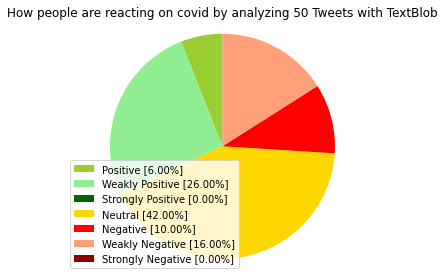

In [159]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_TextBlob, tool_name='TextBlob', keyword='covid')

#### NLTK - Vader Lexicon

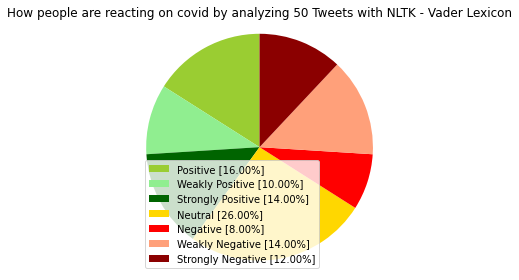

In [101]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_NLTK, tool_name='NLTK - Vader Lexicon', keyword='covid')

#### RNN

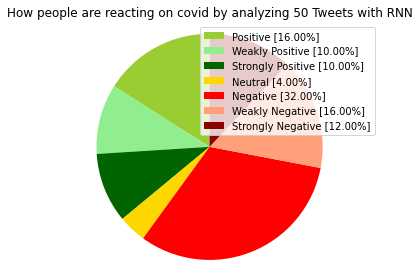

In [170]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_RNN, tool_name='RNN', keyword='covid')

# Neutral section can appears in some cases because of the 'None' values

#### BERT

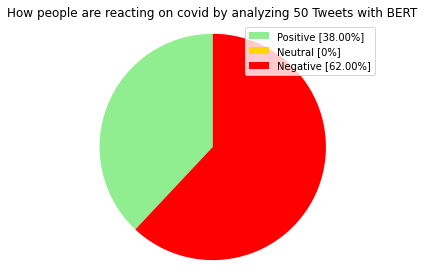

In [108]:
dataframe_size=len(twitter_dataframe_BERT)

dataframe_sentiment_labels=list(twitter_dataframe_BERT["Sentiment"])
pos_num = ["pos" == label for label in dataframe_sentiment_labels].count(True)
neg_num = ["neg" == label for label in dataframe_sentiment_labels].count(True)

pos_percent = percentage(part=pos_num, whole=datraframe_size)
neg_percent = percentage(part=neg_num, whole=datraframe_size)

visualization_for_BERT(positive=pos_percent, neutral=0, negative=neg_percent, keyword='covid', limit=dataframe_size)

## Information Extraction

## Named Entity Recognition (NER)